## Breast Cancer Detection Model 

### Objective 

The objective is to evaluate and compare the performance of five supervised learning algorithms—Logistic Regression, Decision Tree, Random Forest, SVM, and k-NN—on the breast cancer dataset from sklearn. This involves data preprocessing, model implementation, and performance analysis to identify the most effective algorithm for this classification problem.

### Data Description

Source: The dataset is sourced from the sklearn library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading and Preprocessing (2 marks)
Load the breast cancer dataset from sklearn.

Preprocess the data to handle any missing values and perform necessary feature scaling.

Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

### Data Collection:

In [2]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# converting to dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
df['target'] = data.target

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [23]:
df.shape

(569, 31)

### Checking for Outliers

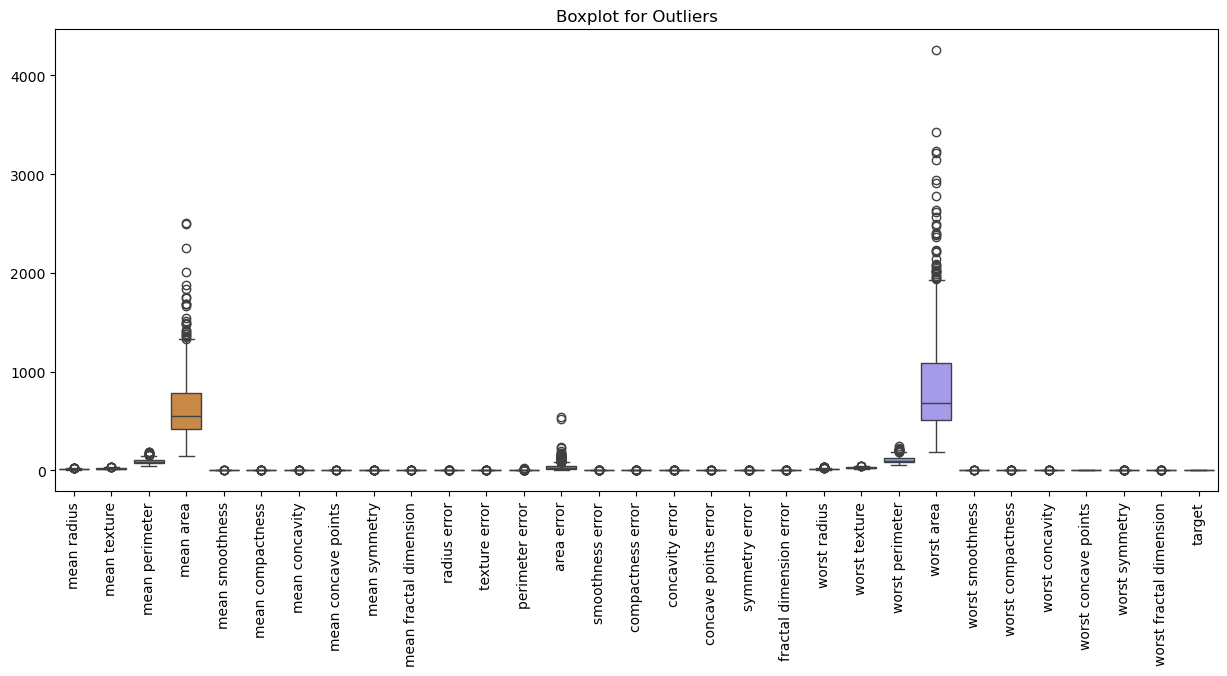

In [25]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outliers")
plt.show()

In [27]:
import pandas as pd

# Assuming `df` is your DataFrame containing all features (excluding target)
# Exclude the 'target' column if present
features_df = df.drop(columns=['target'], errors='ignore')

# Define a function to detect outliers based on IQR
def detect_outliers_iqr(dataframe):
    outliers = {}
    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)  # First quartile
        Q3 = dataframe[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)].index.tolist()
    return outliers

# Call the function and get outliers
outliers = detect_outliers_iqr(features_df)
print("Outliers detected:", outliers)


Outliers detected: {'mean radius': [82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521], 'mean texture': [219, 232, 239, 259, 265, 455, 562], 'mean perimeter': [82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 461, 503, 521], 'mean area': [23, 82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339, 352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564], 'mean smoothness': [3, 105, 122, 504, 520, 568], 'mean compactness': [0, 3, 9, 12, 14, 78, 82, 108, 122, 181, 190, 258, 351, 352, 400, 567], 'mean concavity': [0, 68, 78, 82, 108, 112, 122, 152, 180, 202, 212, 258, 351, 352, 400, 461, 563, 567], 'mean concave points': [78, 82, 108, 122, 180, 202, 212, 352, 393, 461], 'mean symmetry': [3, 22, 25, 60, 78, 108, 122, 146, 150, 152, 258, 288, 323, 424, 561], 'mean fractal dimension': [3, 9, 68, 71, 78, 151, 152, 176, 258, 318, 376, 379, 504, 505, 507], 'radius error': [0, 12, 25, 27, 38, 42, 77, 78, 82, 108, 122, 138, 161, 168, 210, 212, 218, 236, 250, 258, 265, 272,

In [29]:
for column in features_df.columns:
    Q1 = features_df[column].quantile(0.25)
    Q3 = features_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    features_df[column] = features_df[column].clip(lower=lower_bound, upper=upper_bound)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


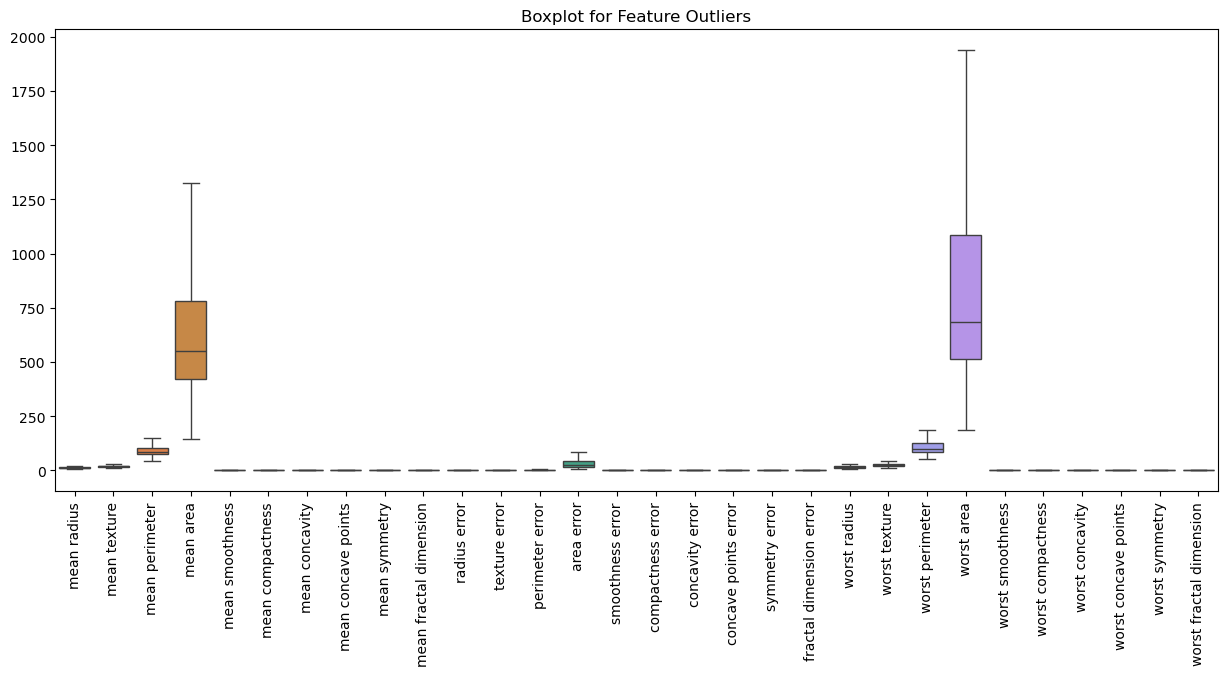

In [31]:
# Plot boxplots for all features
plt.figure(figsize=(15, 6))
sns.boxplot(data=features_df)
plt.xticks(rotation=90)
plt.title("Boxplot for Feature Outliers")
plt.show()


In [33]:
# checking skewness
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [35]:
df_final = df.copy()
df_final.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


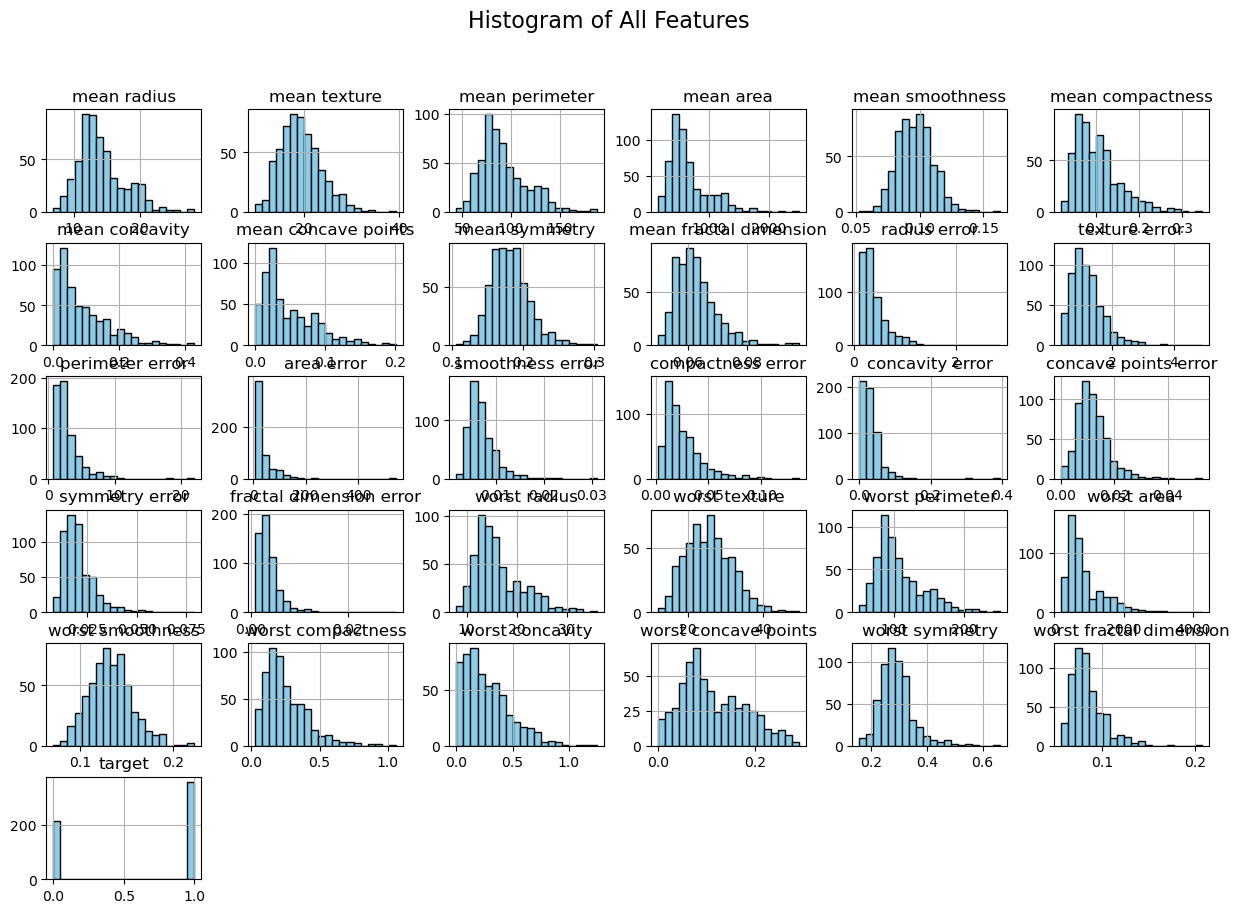

In [37]:
#Histogram

# Plot histograms for all features
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of All Features", fontsize=16)
plt.show()


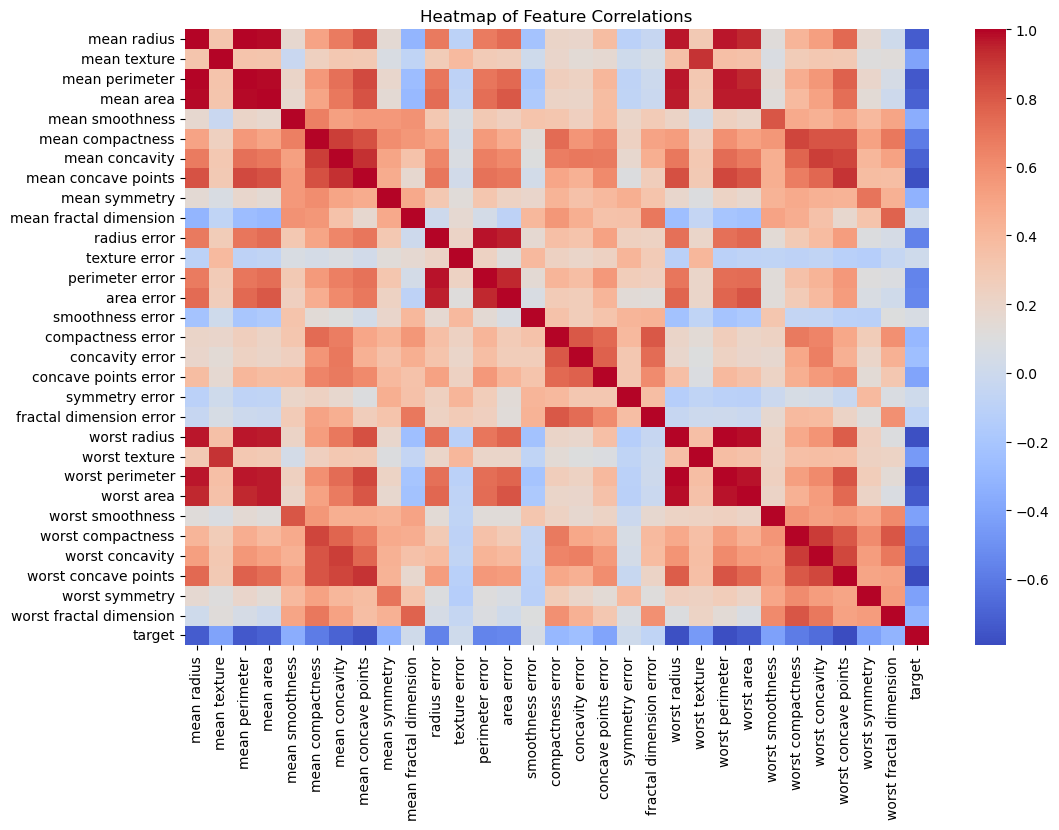

In [38]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()


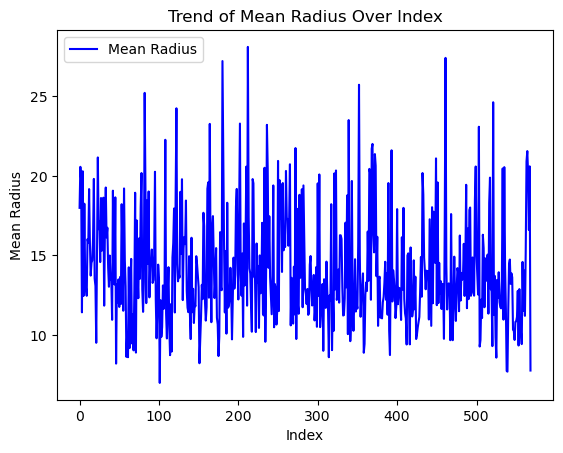

In [39]:
# Example line plot for feature trends
plt.plot(df.index, df['mean radius'], label='Mean Radius', color='blue')
plt.title("Trend of Mean Radius Over Index")
plt.xlabel("Index")
plt.ylabel("Mean Radius")
plt.legend()
plt.show()


## Feature selection

In [43]:
# Using correlation matrix

# Compute correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"Features to drop due to high correlation: {to_drop}")

# Drop features
df_reduced = df_final.drop(columns=to_drop)

Features to drop due to high correlation: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']


In [45]:
df_reduced.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,0


## X and Y

In [47]:
x = df_reduced.drop('target', axis=1)
x

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [49]:
y = df_reduced['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

### Scaling

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [53]:
#Applying scaling
x_normalized = minmax_scaler.fit_transform(x)

# converting into dataframe
x_normalized = pd.DataFrame(x_normalized)
x_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1.000000,0.139091,0.175875,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,0.186816,0.233822,0.093065,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.157500,0.142595


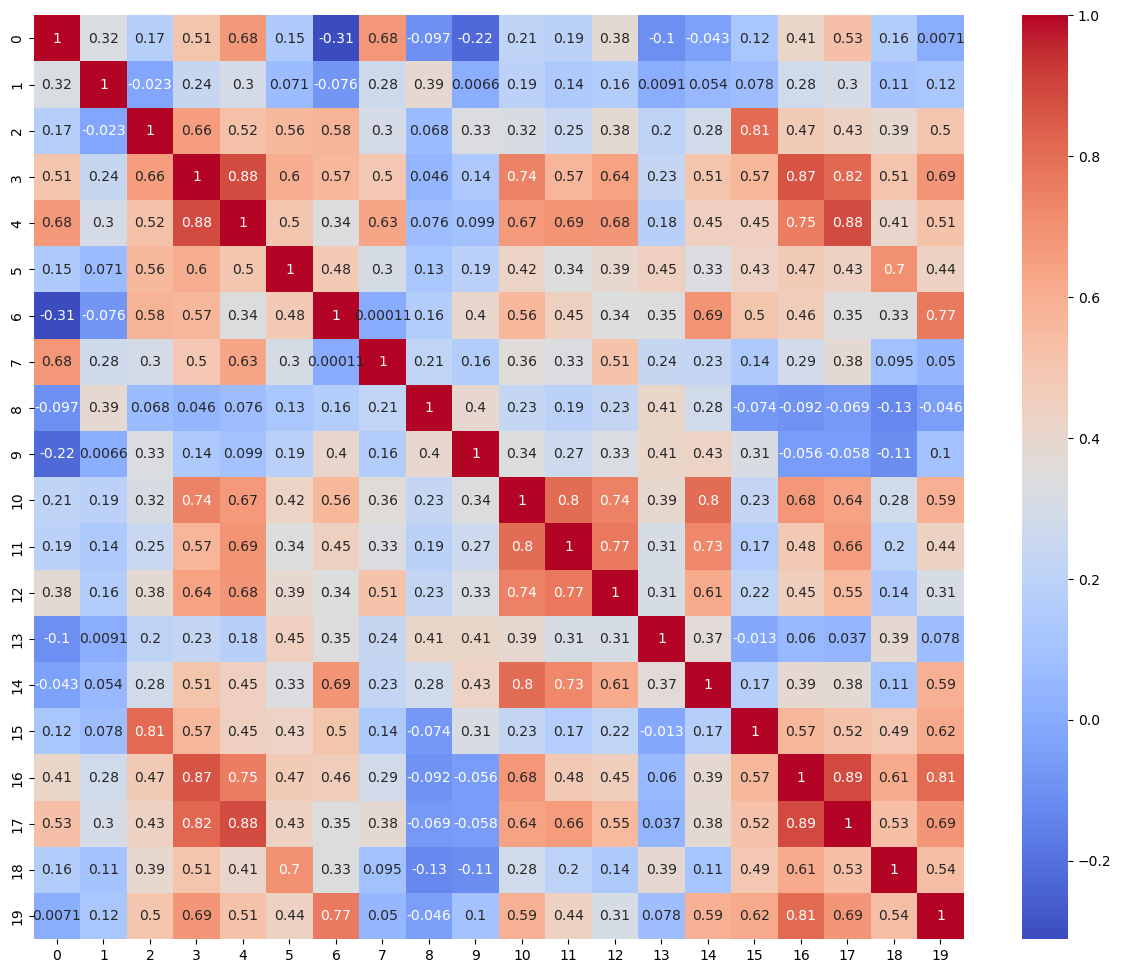

In [55]:
correlation = x_normalized.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


## Split the dataset into training and testing sets

In [57]:
from sklearn.model_selection import train_test_split


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

## Classification Algorithm Implementation

Classification Algorithms: Brief Descriptions and Suitability
#### 1. Logistic Regression
How it works:
Logistic Regression is a linear model that uses the logistic (sigmoid) function to predict probabilities for binary classification. The decision boundary is linear, separating the classes by maximizing the likelihood of the observed data.

Why suitable for this dataset:
The dataset is well-structured, and logistic regression performs well for linearly separable data. It’s a good baseline due to its simplicity and interpretability.
#### 2. Decision Tree Classifier
How it works:
Decision Trees split the dataset recursively based on feature values that maximize information gain (or minimize impurity, like Gini Index). The process continues until leaf nodes classify the data.
why suitable for this dataset:
Decision trees handle both numerical and categorical data well and can model complex interactions between features. They are interpretable and work effectively with the dataset's mix of features.
#### 3. Random Forest Classifier
How it works:
Random Forest combines multiple decision trees (a forest) where each tree is trained on a random subset of the data and features. The final prediction is the majority vote (classification) or average (regression) of individual trees.

Why suitable for this dataset:
It’s robust to overfitting due to its ensemble nature and provides high accuracy on structured datasets like this. It can handle feature importance well, which is crucial for understanding significant predictors of breast cancer.
#### 4. Support Vector Machine (SVM)
How it works:
SVM finds the hyperplane that maximizes the margin between two classes. For non-linearly separable data, it uses kernels (e.g., radial basis function or polynomial) to map features into higher dimensions for separation.

Why suitable for this dataset:
SVM is effective for small-to-medium-sized datasets with a clear margin of separation. The breast cancer dataset has a limited number of samples and may benefit from kernel methods for separating classes.
#### 5. k-Nearest Neighbors (k-NN)
How it works:
k-NN classifies a sample based on the majority class of its k closest neighbors (in terms of a distance metric like Euclidean). It’s a non-parametric and instance-based learning algorithm.

Why suitable for this dataset:
k-NN works well on datasets where class distributions are distinct in feature space. While computationally expensive for large datasets, it performs well on this dataset's manageable size and dimensionality.


#### Train the Models
Train each of the five algorithms on the training data.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
}

# Train models
for name, model in models.items():
    model.fit(x_train, y_train)


#### Evaluate Model Performance
Evaluate each model's performance using accuracy, precision, recall, F1-score, and confusion matrix.

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = []

for name, model in models.items():
    # Predict on test data
    y_pred = model.predict(x_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report["weighted avg"]["f1-score"]
    
    # Store results
    results.append({"Model": name, "Accuracy": accuracy, "F1-Score": f1_score})
    
    # Print detailed classification report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Convert results to a DataFrame
import pandas as pd
results_df = pd.DataFrame(results)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[38  5]
 [ 1 70]]
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.94      0.92      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[39  4]
 [ 6 65]]
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.95      0.95 

#### Compare Models
Compare the performance metrics in a summary table.

In [65]:
# Sort models by accuracy or F1-score
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)


                 Model  Accuracy  F1-Score
2        Random Forest  0.964912  0.964912
0  Logistic Regression  0.947368  0.946806
4                 k-NN  0.947368  0.947368
3                  SVM  0.938596  0.938450
1        Decision Tree  0.912281  0.912651


#### Identify Best and Worst Models

## Hyperparameter Tuning with RandomizedSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

In [80]:
# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(x, y)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, scoring='accuracy', verbose=2)

In [74]:
# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Best Cross-Validation Accuracy: 0.9543393882937432


### Saving the model

In [82]:
import joblib

# Save the best model
joblib.dump(random_search.best_estimator_, 'rf_model.joblib')
print("Model saved to rf_model.joblib")


Model saved to rf_model.joblib
